# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [1]:
# Libraries used in this lab assignment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import re

# The following code defines the paths of the data files
train_path = 'cda-lab-1-credit-card-fraud/train_data.csv'
test_path = 'cda-lab-1-credit-card-fraud/test_data.csv'

In [2]:
# Load the data into a pandas dataframe
df = pd.read_csv(train_path)

### Data Preprocessing
We create two dataframes D and X with and without a label correspondingly. All numerical features have been scaled according to the standard scaler, and categorical according to the label encoder.

In [3]:
# Train data loading and preprocessing
df1 = pd.read_csv(train_path)

#Prepare card id and ip id for plotting

# 1.Card ID
card_enc = LabelEncoder()
card_enc.fit(df1['card_id'])
df1['card_id'] = card_enc.transform(df1.card_id)

# 2.IP ID
ip_enc = LabelEncoder()
ip_enc.fit(df1['ip_id'])
df1['ip_id'] = ip_enc.transform(df1.ip_id)

#Encoding, Cleaning the data
df1.loc[df1['cardverificationcodesupplied'].isna(),'cardverificationcodesupplied'] = False
df1.loc[df1['issuercountrycode'].isna(),'issuercountrycode'] = 'ZZ'
df1.loc[df1['shoppercountrycode'].isna(),'shoppercountrycode'] = 'ZZ'

unique_issuer_cc = df1['issuercountrycode'].unique()
unique_shopper_cc = df1['shoppercountrycode'].unique()
both = np.append(unique_issuer_cc, unique_shopper_cc)
df_countrycodes = pd.DataFrame(both)
unique_codes = df_countrycodes[0].unique()
enc = LabelEncoder()
enc.fit(unique_codes)
df1['issuercountrycode'] = enc.transform(df1.issuercountrycode)
df1['shoppercountrycode'] = enc.transform(df1.shoppercountrycode)
def conv(row):
    currency_dict = {"BGN": 1.9558, "NZD": 1.6805, "ILS": 4.0448, "RUB": 72.2099, "CAD": 1.5075, "USD": 1.1218,
                     "PHP": 58.125, "CHF": 1.1437, "ZAR": 16.0224, "AUD": 1.5911, "JPY": 124.93, "TRY": 6.6913,
                     "HKD": 8.8007, "MYR": 4.6314, "THB": 35.802, "HRK": 7.413, "NOK": 9.6678, "IDR": 15953.68,
                     "DKK": 7.4646, "CZK": 25.659, "HUF": 322.97, "GBP": 0.86248, "MXN": 21.2829, "KRW": 1308.01,
                     "ISK": 136.2, "SGD": 1.5263, "BRL": 4.405, "PLN": 4.2868, "INR": 78.0615, "RON": 4.7596,
                     "CNY": 7.5541, "SEK": 10.635}
    return row['amount'] / (currency_dict[row['currencycode']]*100)

df1['amount_eur'] = df1.apply(lambda x: conv(x), axis=1)
df['amount_eur'] = df1.apply(lambda x: conv(x), axis=1)

# label encoding for categorical variables
enc1 = LabelEncoder()
enc1.fit(df1['txvariantcode'])
df1['txvariantcode'] = enc1.transform(df1.txvariantcode)

enc2 = LabelEncoder()
enc2.fit(df1['currencycode'])
df1['currencycode'] = enc2.transform(df1.currencycode)

enc3 = LabelEncoder()
enc3.fit(df1['shopperinteraction'])
df1['shopperinteraction'] = enc3.transform(df1.shopperinteraction)

df1['accountcode'] = df1['accountcode'].apply(lambda x: re.sub('Account','',x))
df1['accountcode_cc'] = 0
df1.loc[(df1['accountcode'] == 'UK'),'accountcode_cc'] = 'GB'
df1.loc[(df1['accountcode'] == 'Mexico'),'accountcode_cc'] = 'MX'
df1.loc[(df1['accountcode'] == 'Sweden'),'accountcode_cc'] = 'SE'
df1.loc[(df1['accountcode'] == 'APAC'),'accountcode_cc'] = 'APAC'

enc4 = LabelEncoder()
enc4.fit(df1['accountcode'])
df1['accountcode'] = enc4.transform(df1.accountcode)

### Better to use one-hot encoding, very few categories
enc5 = LabelEncoder()
enc5.fit(df1['cardverificationcodesupplied'])
df1['cardverificationcodesupplied'] = enc5.transform(df1.cardverificationcodesupplied)

df1.loc[df1['mail_id'].str.contains('na',case=False),'mail_id'] = 'email99999'

enc6 = LabelEncoder()
enc6.fit(df1['mail_id'])
df1['mail_id'] = enc6.transform(df1.mail_id)

df1.loc[df1['cvcresponsecode'] > 2,'cvcresponsecode'] = 3

#Feature Engineering
df1['countries_equal'] = (df1['shoppercountrycode'] == df1['issuercountrycode'])
df1.loc[df1['countries_equal'] == False,'countries_equal'] = 0
df1.loc[df1['countries_equal'] == True,'countries_equal'] = 1

# Scale numeric features using StandardScaler
scaler = StandardScaler()
df1[['bin', 'amount', 'amount_eur']] = scaler.fit_transform(df1[['bin', 'amount', 'amount_eur']])



X = df1[['issuercountrycode','txvariantcode','bin','amount','currencycode','shoppercountrycode','shopperinteraction','cardverificationcodesupplied','cvcresponsecode','accountcode','mail_id','ip_id','card_id','amount_eur','countries_equal']]
D = df1[['label', 'issuercountrycode','txvariantcode','bin','amount','currencycode','shoppercountrycode','shopperinteraction','cardverificationcodesupplied','cvcresponsecode','accountcode','mail_id','ip_id','card_id','amount_eur','countries_equal']]

/var/folders/gn/8cmn0qdj1mx7g0mxnt5q722h0000gp/T/ipykernel_77239/4263604524.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'GB' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[(df1['accountcode'] == 'UK'),'accountcode_cc'] = 'GB'
/var/folders/gn/8cmn0qdj1mx7g0mxnt5q722h0000gp/T/ipykernel_77239/4263604524.py:81: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df1.loc[df1['countries_equal'] == False,'countries_equal'] = 0


In [4]:
fraudulent_df = df.query('label==1')
normal_df = df[df['label'] == 0]

# optional: print the amount of fraudulent and normal transactions
# print('Fraudulent transactions: ', fraudulent_df.shape[0])
# print('Normal transactions: ', normal_df.shape[0])
# print('all transactions: ', df1.shape[0])

## 2. Imbalance task – 1 A4 – Individual

In [5]:
### Implementing SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors

## Implementing the SMOTE algorithm

In [6]:
# Define the numerical and categorical columns
numerical_columns = ['bin', 'amount', 'amount_eur']
categorical_columns = ['label', 'issuercountrycode', 'txvariantcode', 'currencycode',
       'shoppercountrycode', 'shopperinteraction',
       'cardverificationcodesupplied', 'cvcresponsecode', 'accountcode',
       'mail_id', 'ip_id', 'card_id', 'countries_equal']

# Define the features and the labels
X = D.drop(['label'], axis=1)
y = D['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# to perform SMOTE, combine the features and labels
train_D = pd.concat([X_train, y_train], axis=1)

# separate the numerical and categorical columns
numerical_data = train_D[train_D['label'] == 1][numerical_columns].values
categorical_data = train_D[train_D['label'] == 1][categorical_columns].values

In [8]:
def SMOTE(T, N=100, k=3):
    """
    Generate synthetic samples using the Synthetic Minority Over-sampling Technique (SMOTE).

    Parameters
    ----------
    T : int
        Number of minority samples.
    N : int, optional
        Percentage of SMOTE. Default is 100.
    k : int, optional
        Number of nearest neighbors. Default is 3.

    Returns
    -------
    new_samples_df : pandas.DataFrame
        DataFrame containing the synthetic samples.
    """
    
    # Check if N is less than 100
    if N < 100:
        # randomize the minority samples
        T = round(T*(N/100))
        N = 100
    # set N to nearest 100
    N = (N//100)

    # Initialize nearest neighbors model
    num_neighbors = k
    neighbors_model = NearestNeighbors(n_neighbors=num_neighbors+1)
    neighbors_model.fit(numerical_data)

    # Find nearest neighbors
    _, indices = neighbors_model.kneighbors(numerical_data)

    # Initialize lists for new numerical and categorical samples
    new_numerical_samples = []
    new_categorical_samples = []

    for i in range(T):
        # Randomly choose a base index and its nearest neighbor index
        base_index = np.random.randint(0, numerical_data.shape[0])

        for _ in range(N):
            # Randomly choose one of the nearest neighbors
            neighbor_index = np.random.choice(indices[base_index, 1:])  # Skip the first index as it's the base itself

            # Interpolate the numerical features
            ratio = np.random.uniform(0, 1)
            new_numerical_sample = numerical_data[base_index] + ratio * (numerical_data[neighbor_index] - numerical_data[base_index])
            new_numerical_samples.append(new_numerical_sample)

            # Set categorical feature to that of nearest neighbor
            new_categorical_samples.append(categorical_data[base_index] if ratio < 0.5 else categorical_data[neighbor_index])

    # Combine new samples into a DataFrame
    new_numerical_samples = pd.DataFrame(new_numerical_samples, columns=numerical_columns)
    new_categorical_samples = pd.DataFrame(new_categorical_samples, columns=categorical_columns)
    new_samples_df = pd.concat((new_numerical_samples, new_categorical_samples), axis=1)
    
    new_samples_df['label'] = 1  # Label all synthetic samples as the minority class

    return new_samples_df

In [15]:
# Get the synthetic data
synthetic_data = SMOTE(276, 200, 3)

synthetic_X = synthetic_data.drop(['label'], axis=1)
synthetic_y = synthetic_data['label']

# Combine the train and synthetic data
SMOTED_X_train = pd.concat([X_train, synthetic_X], ignore_index=True)
SMOTED_y_train = pd.concat([y_train, synthetic_y], ignore_index=True)

### Classifier 1: Random Forest Classifier

In [16]:
# Create a RF classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_clf.fit(SMOTED_X_train, SMOTED_y_train)
# rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predict on the test data
rf_y_pred = rf_clf.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Test accuracy: {rf_accuracy:.5f}")

Test accuracy: 0.99829


### Classifier #2: SVM

In [53]:
# Create a SVM classifier
svm_clf = SVC(probability=True, random_state=42)

# Train the classifier on the training data
svm_clf.fit(SMOTED_X_train, SMOTED_y_train)
# svm_clf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [54]:
# Predict on the test data
svm_y_pred = svm_clf.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Test accuracy: {svm_accuracy:.5f}")

Test accuracy: 0.99831


### Classifier #3: MLP

In [18]:
# Create a MLP classifier
mlp_clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(15, 10, 5), random_state=42)

# Train the classifier on the training data
mlp_clf.fit(SMOTED_X_train, SMOTED_y_train)
# mlp_clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 10, 5), random_state=42)

In [19]:
# Predict on the test data
mlp_y_pred = mlp_clf.predict(X_test)

# Calculate accuracy
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
print(f"Test accuracy: {mlp_accuracy:.5f}")

Test accuracy: 0.99831


### 2a. Print ROC curves

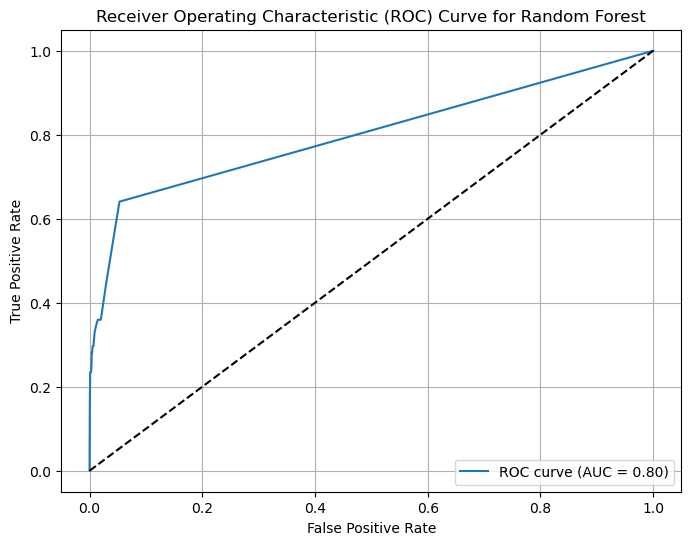

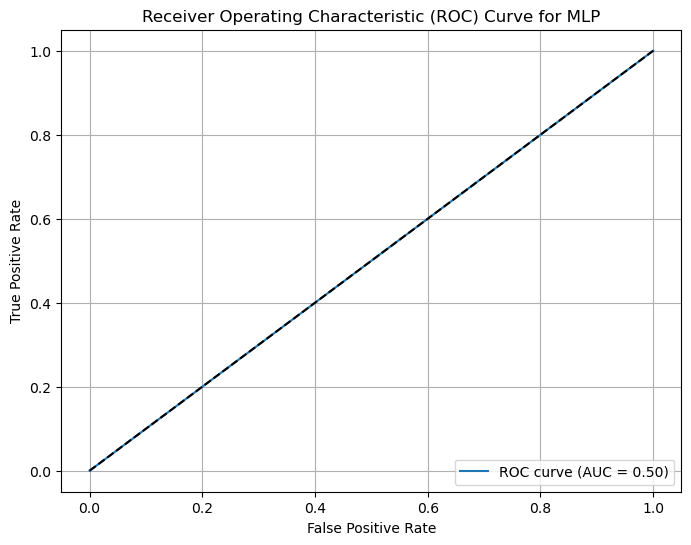

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

classifiers = [
    (rf_clf, 'Random Forest'), 
    (svm_clf, 'SVM'), 
    (mlp_clf, 'MLP')
]

for (clf, name) in classifiers:

    # Get the probabilities of the positive class
    y_probs = clf.predict_proba(X_test)[:, 1]  # Probabilities of positive class

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Compute the AUC
    auc_score = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for ' + name)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

Here we compare the SVM, Random Forest (RF), and MLP classifiers. All have accuracies above 99.8%. The full story, however, is told when looking at the AUC, where the rf gets ~0.80, which outperforms the SVM, and especially the MLP. The RF is already a powerful classifier on its own, and may be strong in handling categorical data. It seems the MLP particularly struggles with categorical features, which is understandable.

### 2c. Is using SMOTE a good idea? Why (not)?

It does not solve all problems, but definitely helps in creating a more balanced model. We gain little to some improvements with it. Training and testing without SMOTE showed the the SVM relied heavily on SMOTE to get past the 0.5 AUC, while little improvements could be seen in the RF and MLP. The problem still lies that SMOTE is designed to generate synthetic data using numerical features, and here the majority of features are categorical. Just because it improves performance here slightly does not mean it holds in general, and it likely depends on class imbalance and amount of smaples generated.